<h1>Spatial Filtering</h1>

Spatial Filtering (Averaging)

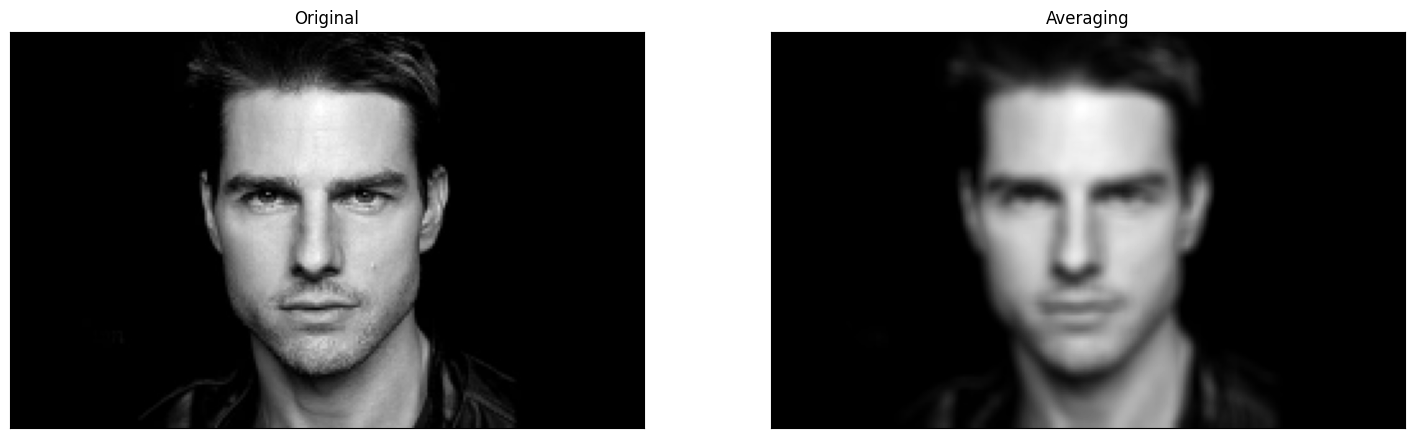

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('Tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

kernel = np.ones((5,5), np.float32)/25
imgc = cv.filter2D(img, -1, kernel)

fig, ax = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(imgc, cmap='gray')
ax[1].set_title('Averaging')
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.show()

Spatial Filtering (Sobel Vertical)

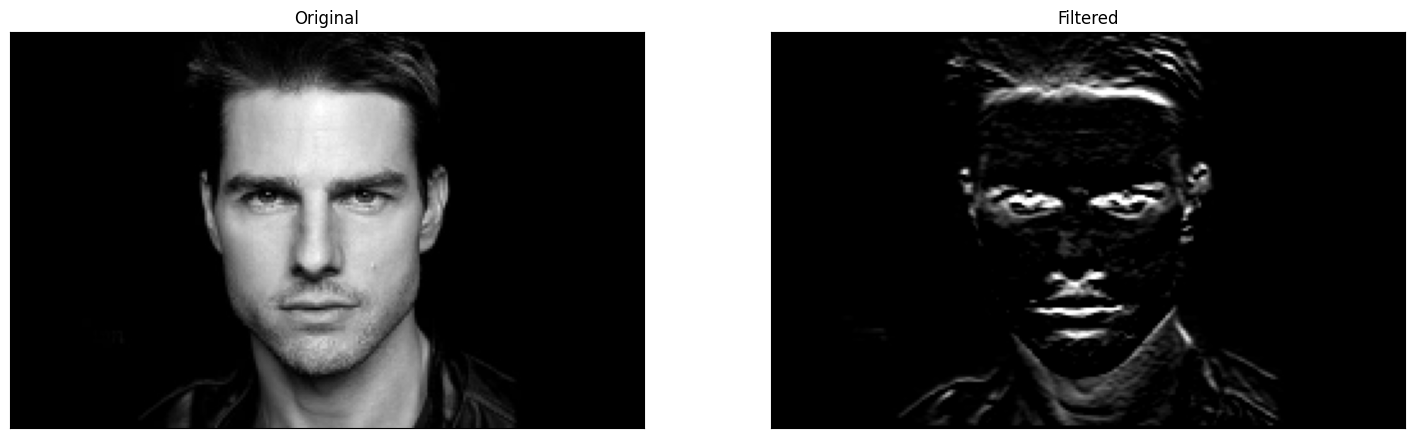

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('Tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

kernel = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')
imgc = cv.filter2D(img, -1, kernel)

fig, ax = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize=(18, 18))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(imgc, cmap='gray')
ax[1].set_title('Filtered')
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.show()


Spatial Filtering (Sobel Horizontal)

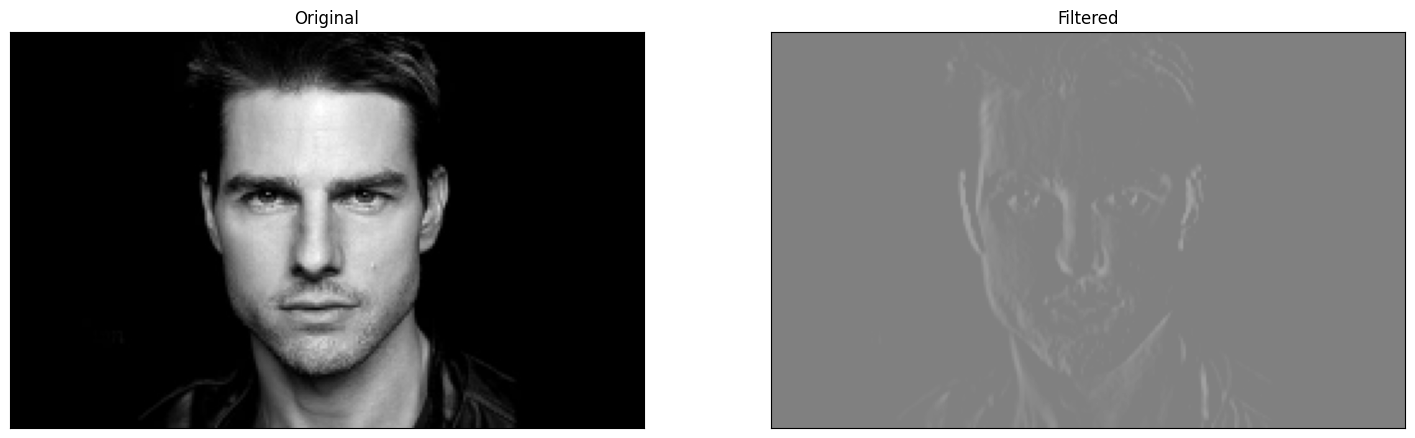

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('Tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

kernel = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float')
imgc = cv.filter2D(img, -1, kernel)

fig, ax = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize=(18, 18))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(imgc, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title('Filtered')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()


Filtering Using Loops

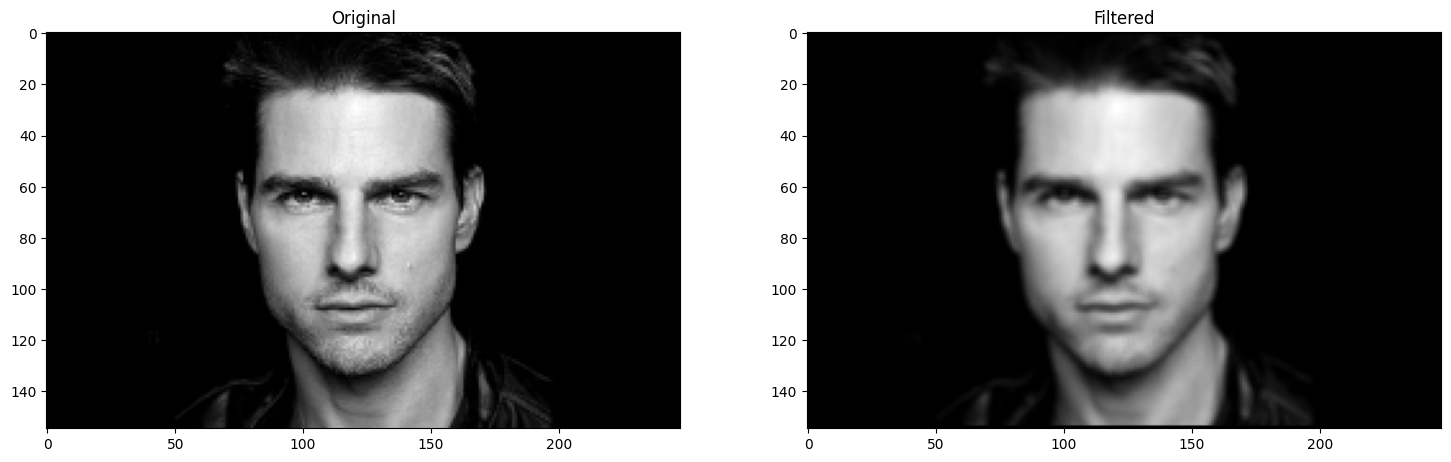

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math

def filter(image, kernel):
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1
    k_hh, k_hw = math.floor(kernel.shape[0]/2), math.floor(kernel.shape[1]/2)
    h, w = image.shape
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    result = np.zeros((h, w), dtype='float')

    for m in range(k_hh, h -k_hh):
          for n in range(k_hw, w - k_hw):
                result[m, n] = np.dot(image_float[m - k_hh:m + k_hh + 1, n - k_hw:n + k_hw + 1].flatten(), kernel.flatten())
    return result

img = cv.imread('Tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
fig, ax = plt.subplots(1, 2, figsize=(18, 18))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
kernel = np.array([(1/9, 1/9, 1/9), (1/9, 1/9, 1/9), (1/9, 1/9, 1/9)], dtype='float')
imgb = filter(img, kernel)
imgb = imgb * 255.0
imgb = imgb.astype('uint8')
ax[1].imshow(imgb, cmap='gray')
ax[1].set_title('Filtered')
plt.show()

Sharpening

DescribeResult(nobs=38440, minmax=(-70.0, 84.0), mean=0.001560874, variance=37.234260259177894, skewness=0.059722902247643775, kurtosis=20.291360494716184)


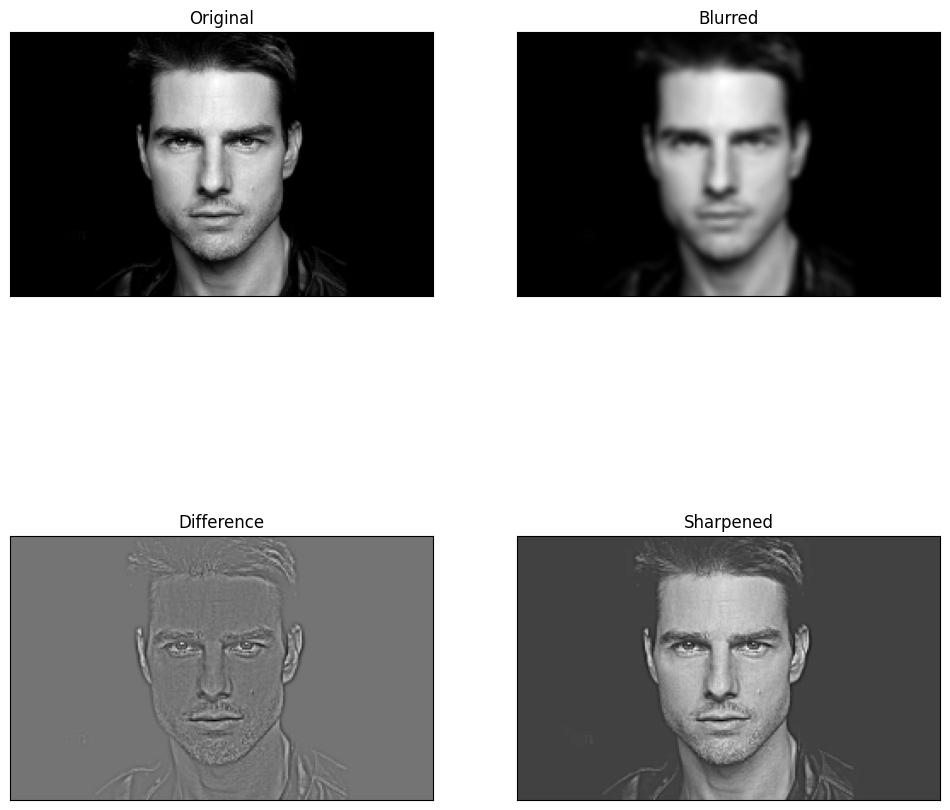

In [4]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats

img = cv.imread('Tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

sigma = 2
kernel = cv.getGaussianKernel(5, sigma)
blurred = cv.sepFilter2D(img, -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)
diff = img.astype('float32') - blurred.astype('float32')

sharpened = cv.addWeighted(img.astype('float32'), 1.0, diff, 1.5, 0)
print(stats.describe(diff.ravel()))

fig, ax = plt.subplots(2, 2, sharex = 'all', sharey = 'all', figsize=(12, 12))
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('Original')
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])
ax[0, 1].imshow(blurred, cmap='gray')
ax[0, 1].set_title('Blurred')
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])
ax[1, 0].imshow(diff, cmap='gray')
ax[1, 0].set_title('Difference')
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])
ax[1, 1].imshow(sharpened, cmap='gray')
ax[1, 1].set_title('Sharpened')
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])
plt.show()


Smoothing with Box Filter

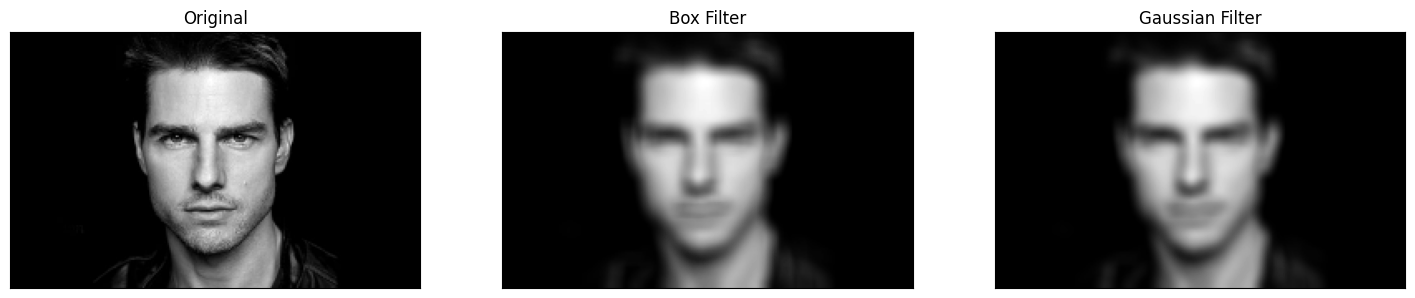

In [6]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

img = cv.imread('Tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
# box filter
box = np.ones((9, 9), dtype='float32') / 81
imgb = cv.filter2D(img, -1, box)
# gaussian filter
gaus = cv.getGaussianKernel(9, 4)
imgg = cv.sepFilter2D(img, -1, gaus, gaus)
fig, ax = plt.subplots(1, 3, sharex = 'all', sharey = 'all', figsize=(18, 18))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(imgb, cmap='gray')
ax[1].set_title('Box Filter')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].imshow(imgg, cmap='gray')
ax[2].set_title('Gaussian Filter')
ax[2].set_xticks([])
ax[2].set_yticks([])
plt.show()


Creating a Gaussian Kernel

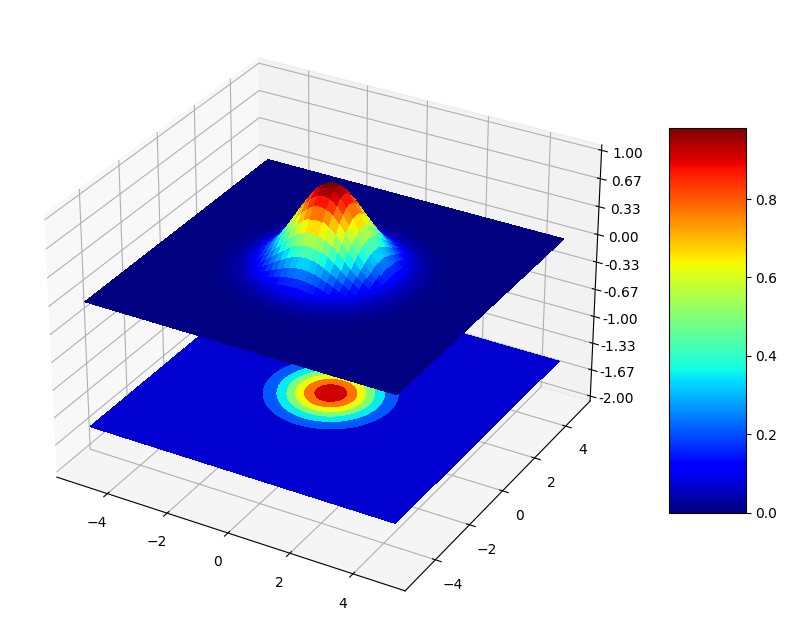

In [14]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sigma = 1

X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2 + Y**2)/(2*sigma**2))
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(0, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z)-1.5, cmap=cm.jet)
ax.set_zlim(np.min(Z)-2, np.max(Z))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.axis
plt.show()
 

Gaussian Noise Filtering

uint8
232
(310, 496, 3)


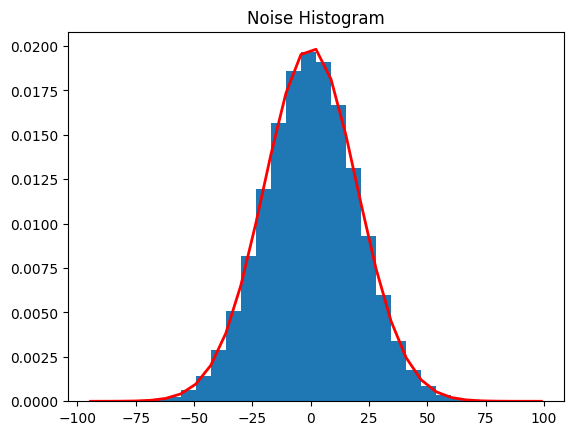

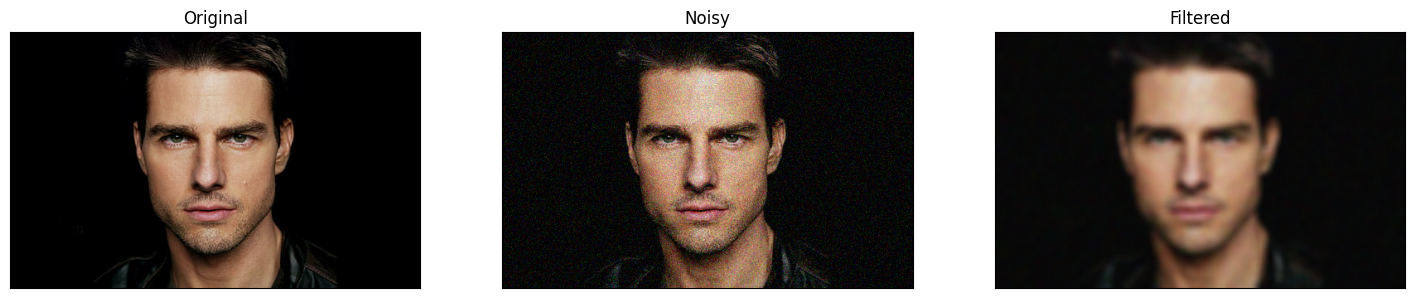

In [26]:
img = cv.imread('Tom.jpg', cv.IMREAD_COLOR)
print(img.dtype)
print(img.max())
print(img.shape)
mu = 0.0
sigma = 20
gauss = np.array(img.shape).astype('uint8')
h, w, c = img.shape
gauss = np.random.normal(mu, sigma, (h, w, c))
# gauss = gauss.reshape(h, w, c)
noisy = cv.add(img, gauss, dtype=cv.CV_8UC3)

count, bins, ignored = plt.hist(gauss.flatten(), 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
plt.title('Noise Histogram')
plt.show()
sigma = 5
kernel = cv.getGaussianKernel(11, sigma)
filtered = cv.sepFilter2D(noisy, -1, kernel, kernel)

fig, ax = plt.subplots(1, 3, sharex = 'all', sharey = 'all', figsize=(18, 18))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].set_xticks([])    
ax[0].set_yticks([])
ax[1].imshow(cv.cvtColor(noisy, cv.COLOR_BGR2RGB))
ax[1].set_title('Noisy')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].imshow(cv.cvtColor(filtered, cv.COLOR_BGR2RGB))
ax[2].set_title('Filtered')
ax[2].set_xticks([])
ax[2].set_yticks([])
plt.show()


Effect of $sigma$

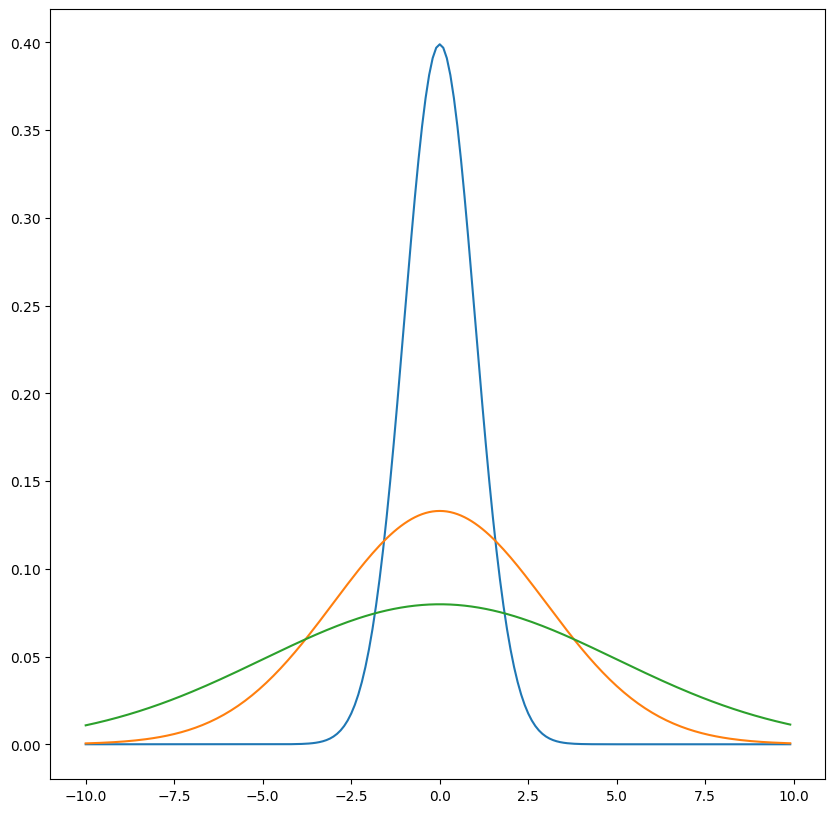

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def g(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
x = np.arange(-10, 10, 0.1)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(x, g(x, 0, 1), label='\sigma=1$')
ax.plot(x, g(x, 0, 3), label='\sigma=3$')
ax.plot(x, g(x, 0, 5), label='\sigma=5$')
ax.legend
plt.show()


Noise

In [58]:
import os
from scipy import stats
def noisy(noise_typ, image):
    if noise_typ == "gauss": #Gaussian-distributed additive noise
        row, col, ch = image.shape
        mean = 0
        var = 400
        sigma = var**0.5
        gauss = np.random.normal(mean, sigma, (row, col, ch))
        gauss = gauss.reshape(row, col, ch)
        noisy = image + gauss
        noisy = np.clip(noisy, 0, 255)
        print(stats.describe(noisy.ravel()))
        return noisy
    elif noise_typ == "s&p": #Replaces random pixels with 0 or 1
        # row, col, ch = image.shape
        s_vs_p = 0.5
        amount = 0.04
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i, int(num_salt)) for i in image.shape]
        out[coords[0], coords[1], :] = 255
        # Pepper mode
        num_pepper = np.ceil(amount * image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i, int(num_pepper)) for i in image.shape]
        out[coords[0], coords[1], :] = 0
        return out
    elif noise_typ == "poisson": #Poisson-distributed noise generated from the data
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ == "speckle": #Multiplicative noise using out = image + n*image,where n is uniform noise with specified mean & variance
        row, col, ch = image.shape
        gauss = np.random.randn(row, col, ch)
        gauss = gauss.reshape(row, col, ch)
        noisy = image + image * gauss
        noisy = np.clip(noisy, 0, 255)
        return noisy

img = cv.imread('Tom.jpg', cv.IMREAD_COLOR)
im1 = noisy('gauss', img.astype('float32'))
im2 = noisy('s&p', img.astype('float32'))
im3 = noisy('poisson', img.astype('float32'))
im4 = noisy('speckle', img.astype('float32'))


cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img)
cv.waitKey(0)
cv.imshow("Image", im1.astype('uint8'))
cv.waitKey(0)
cv.imshow("Image", im2.astype('uint8'))
cv.waitKey(0)
cv.imshow("Image", im3.astype('uint8'))
cv.waitKey(0)
cv.imshow("Image", im4.astype('uint8'))
cv.waitKey(0)
cv.destroyAllWindows()

DescribeResult(nobs=461280, minmax=(0.0, 255.0), mean=37.56000980353638, variance=3231.2278142865816, skewness=1.690084027137921, kurtosis=1.7844077167204997)


Effect of Gaussian Noise Level and Smoothing Level

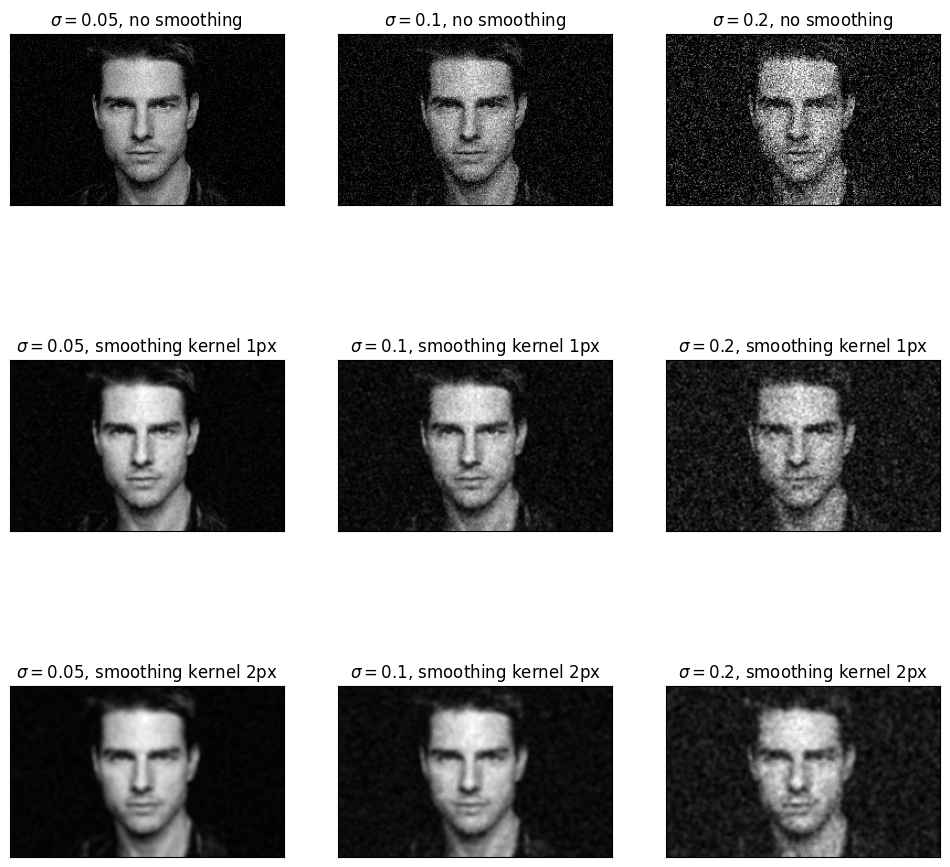

In [51]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('Tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
mean = 0
noise = [0.05, 0.1, 0.2]
sigma = [0, 1, 2]
sigma_text = ['no smoothing', 'smoothing kernel 1px', 'smoothing kernel 2px']
fig, ax = plt.subplots(3, 3, sharex = 'all', sharey = 'all', figsize=(12, 12))

for i in range(3):
    for j in range(3):
        gauss = np.random.normal(mean, noise[i]*255, img.shape)
        gauss = gauss.reshape(img.shape)
        imn = img + gauss
        imn = np.clip(imn, 0, 255)
        ksize = sigma[j]*2 + 1
        if j != 0:
            imn = cv.GaussianBlur(imn, (ksize, ksize), sigmaX=sigma[j], sigmaY=sigma[j])
        ax[j, i].imshow(imn, cmap='gray')
        ax[j, i].set_title(r'$\sigma={0}$, {1}'.format(noise[i], sigma_text[j]))
        ax[j, i].set_xticks([])
        ax[j, i].set_yticks([])
plt.show()

Failure of Gaussian Smoothing to Handle Salt and Pepper Noise

In [60]:
def noisy(noise_typ, image):
    if noise_typ == "s&p": #Replaces random pixels with 0 or 1
        # row, col, ch = image.shape
        s_vs_p = 0.5
        amount = 0.04
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i, int(num_salt)) for i in image.shape]
        out[coords[0], coords[1]] = 255
        # Pepper mode
        num_pepper = np.ceil(amount * image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i, int(num_pepper)) for i in image.shape]
        out[coords[0], coords[1]] = 0
        return out
    

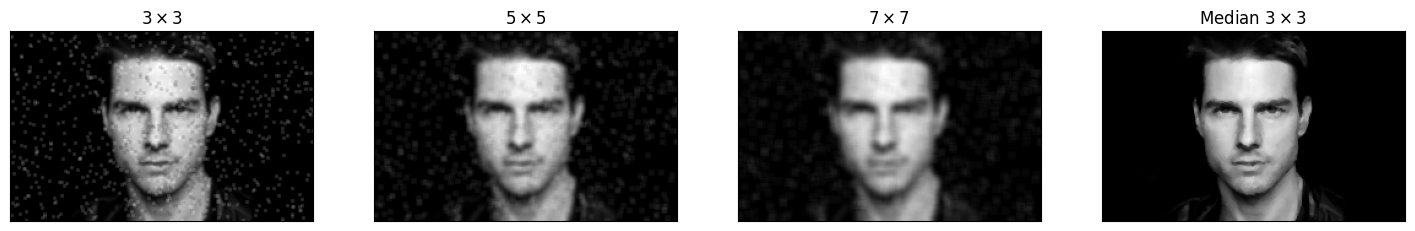

In [62]:
img = cv.imread('Tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
imn = noisy('s&p', img.astype('float32'))
ksize = np.array([3, 5, 7])
sigma = ksize / 2
fig, ax = plt.subplots(1, 4, sharex = 'all', sharey = 'all', figsize=(18, 18))

for i in range(3):
    imf = cv.GaussianBlur(imn, (ksize[i], ksize[i]), sigmaX=sigma[i], sigmaY=sigma[i])
    ax[i].imshow(imf, cmap='gray')
    ax[i].set_title(r'${0}\times {0}$'.format(ksize[i]))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

imf = cv.medianBlur(imn, 3)
ax[3].imshow(imf, cmap='gray')
ax[3].set_title(r'Median ${0}\times {0}$'.format(3))
ax[3].set_xticks([])
ax[3].set_yticks([])
plt.show()

Median Filtering

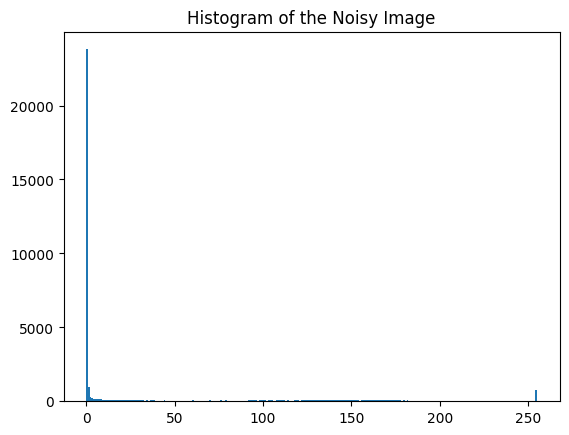

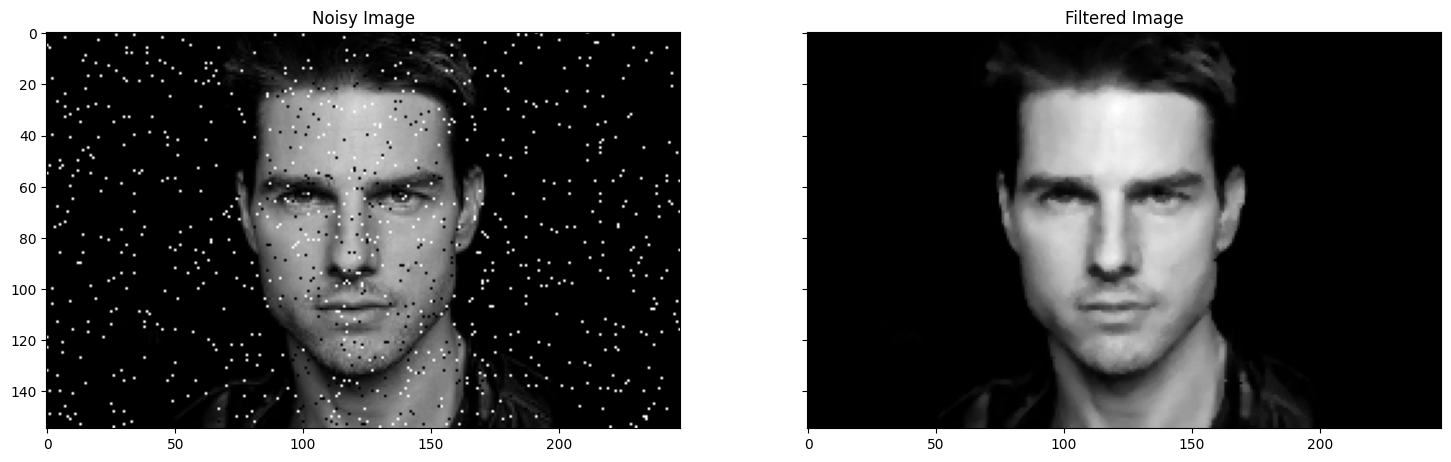

In [66]:
img = cv.imread('Tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
imn = noisy('s&p', img.astype('float32'))
imf = cv.medianBlur(imn, 3)
plt.hist(imn.ravel(), 256)
plt.title('Histogram of the Noisy Image')

fig, ax = plt.subplots(1, 2, sharex = 'all', sharey = 'all', figsize=(18, 18))
ax[0].imshow(imn, cmap='gray')
ax[0].set_title('Noisy Image')
ax[1].imshow(imf, cmap='gray')
ax[1].set_title('Filtered Image')
plt.show()

Unsharp Mask Filter

(41, 41)


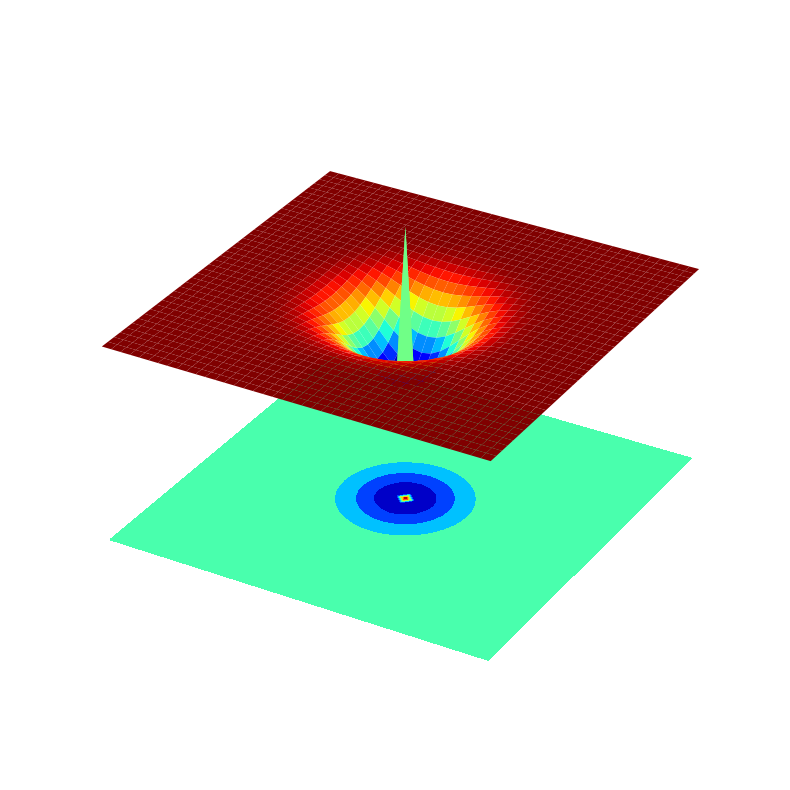

In [68]:
import cv2 as cv

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sigma = 1


X = np.arange(-5, 5.25, 0.25)
Y = np.arange(-5, 5.25, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2 + Y**2)/(2*sigma**2))
imp = np.zeros(Z.shape)
print(Z.shape)
imp[int(Z.shape[0]/2), int(Z.shape[1]/2)] = 2
Z = imp - Z

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=True)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# ax.set_aspect('equal')
#ax.view_init(90, 0)
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z) -1.5, cmap=cm.jet)
ax.set_zlim(np.min(Z) - 2, np.max(Z))
# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
# Hide grid lines
# ax.grid(False)
plt.axis('off')

# Hide axes ticks
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])


plt.show()

Sharpening using Unsharp Mask Filter

([], [])

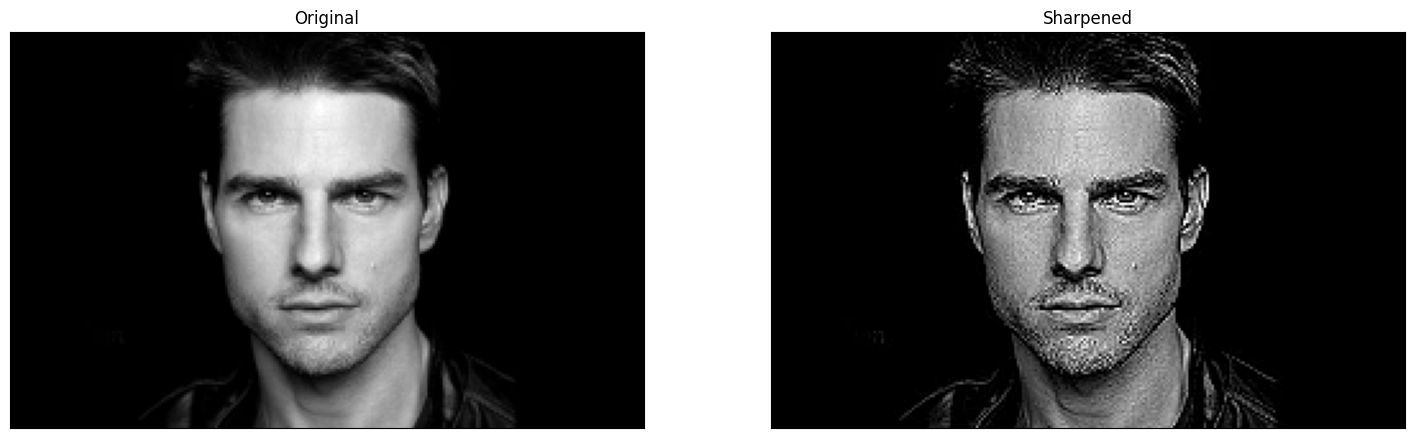

In [70]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('Tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Sobel vertical
kernel = np.array([(0, -1, 0), (-1, 5, -1), (0, -1, 0)], dtype='float')
imgc = cv.filter2D(img,-1,kernel)



fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sharpened')
axes[1].set_xticks([]), axes[1].set_yticks([])

Hybrid Images

In [72]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from scipy import misc
from scipy import ndimage
from scipy import misc
import math
import cv2 as cv

def scaleSpectrum(A):
   return numpy.real(numpy.log10(numpy.absolute(A) + numpy.ones(A.shape)))


# sample values from a spherical gaussian function from the center of the image
def makeGaussianFilter(numRows, numCols, sigma, highPass=True):
   centerI = int(numRows/2) + 1 if numRows % 2 == 1 else int(numRows/2)
   centerJ = int(numCols/2) + 1 if numCols % 2 == 1 else int(numCols/2)

   def gaussian(i,j):
      coefficient = math.exp(-1.0 * ((i - centerI)**2 + (j - centerJ)**2) / (2 * sigma**2))
      return 1 - coefficient if highPass else coefficient

   return np.array([[gaussian(i,j) for j in range(numCols)] for i in range(numRows)])


def filterDFT(imageMatrix, filterMatrix):
   shiftedDFT = fftshift(fft2(imageMatrix))
#    misc.imsave("dft.png", scaleSpectrum(shiftedDFT))

   filteredDFT = shiftedDFT * filterMatrix
#    misc.imsave("filtered-dft.png", scaleSpectrum(filteredDFT))
   return ifft2(ifftshift(filteredDFT))


def lowPass(imageMatrix, sigma):
    n,m = imageMatrix.shape
    return filterDFT(imageMatrix, makeGaussianFilter(n, m, sigma, highPass=False))


def highPass(imageMatrix, sigma):
   n,m = imageMatrix.shape
   return filterDFT(imageMatrix, makeGaussianFilter(n, m, sigma, highPass=True))


def hybridImage(highFreqImg, lowFreqImg, sigmaHigh, sigmaLow):
    highPassed = highPass(highFreqImg, sigmaHigh)
    lowPassed = lowPass(lowFreqImg, sigmaLow)
    cv.namedWindow('HP', cv.WINDOW_AUTOSIZE)
    cv.imshow('HP', highPassed.astype(np.uint8))
    cv.waitKey()
    return highPassed + lowPassed


def playWithFiltering():
    marilyn = cv.imread("Land of Dreams.jpeg", cv.IMREAD_GRAYSCALE)
    highPassedMarilyn = highPass(marilyn, 20)
    lowPassedMarilyn = lowPass(marilyn, 20)

#    misc.imsave("low-passed-marilyn.png", numpy.real(lowPassedMarilyn))
#    misc.imsave("high-passed-marilyn.png", numpy.real(highPassedMarilyn))
#    misc.imsave("sum-of-marilyns.png", numpy.real((highPassedMarilyn + lowPassedMarilyn)/2.0))
    cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
    cv.imshow('Image', highPassedMarilyn)
    cv.waitKey()
    cv.destroyAllWindows()

# if __name__ == "__main__":
einstein = cv.imread("Sun.jpeg", cv.IMREAD_GRAYSCALE)
marilyn = cv.imread("Land of Dreams.jpeg", cv.IMREAD_GRAYSCALE)

hybrid = hybridImage(einstein, marilyn, 25, 10)
#    misc.imsave("marilyn-einstein.png", numpy.real(hybrid))

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', hybrid.astype(np.uint8))
cv.waitKey()
cv.destroyAllWindows()

C:\Users\user\AppData\Local\Temp\ipykernel_18444\1895090396.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  cv.imshow('HP', highPassed.astype(np.uint8))
C:\Users\user\AppData\Local\Temp\ipykernel_18444\1895090396.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
  cv.imshow('Image', hybrid.astype(np.uint8))
